<a href="https://colab.research.google.com/github/sonichandni/image-classification-TF2.0/blob/master/mango_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import os
base_dir = '/content/drive/My Drive/Chandni/Data/images'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training mangoes pictures
train_mangoes_dir = os.path.join(train_dir, 'mangoes')
# train_cats_dir = os.path.join(train_dir, 'cats')
# train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation mangoes pictures
validation_mangoes_dir = os.path.join(validation_dir, 'mangoes')
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
train_mango_fnames = os.listdir( train_mangoes_dir )
print(train_mango_fnames[:10])

['_107318625_gettyimages-102946394.jpg', '8246050.jpg', '1088.970.jpg', '5-Ingredient-Mango-Salsa-Recipe-Gimme-Some-Oven-1-412x600.jpg', '61RPy2Bdbw3L._SX466_.jpg', '5c1225351f0000f00626a771.jpeg', '152415.jpg', '31KSJIUe16L._SX425_.jpg', '20190610-philippine-mangoes_974134BCCF17414E936D70ECC8154E08.jpg', '112.jpg']


In [4]:
print('total training mango images :', len(os.listdir( train_mangoes_dir ) ))
print('total validation mango images :', len(os.listdir( validation_mangoes_dir ) ))

total training mango images : 752
total validation mango images : 288


In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

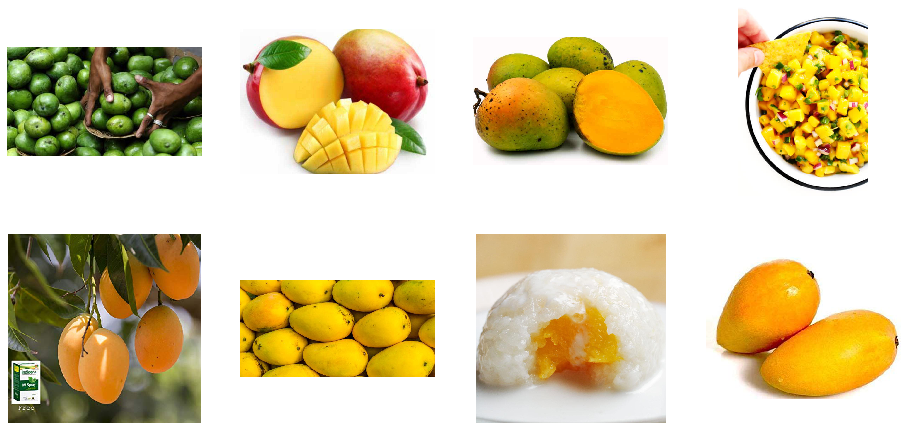

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_mangoes_dir, fname) 
                for fname in train_mango_fnames[ pic_index-8:pic_index] 
               ]

for i, img_path in enumerate(next_cat_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1./255.,
                                   rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5)

test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    # batch_size=32,
                                                    shuffle=True,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                        #  batch_size=32,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 752 images belonging to 2 classes.
Found 288 images belonging to 2 classes.


In [26]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=752,
                              epochs=15,
                              validation_steps=288)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 752 steps, validate for 288 steps
Epoch 1/15
  5/752 [..............................] - ETA: 3:28 - loss: 3.1640e-09 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 24/752 [..............................] - ETA: 3:30 - loss: 2.7320e-09 - acc: 1.0000WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 11280 batches). You may need to use the repeat() function when building your dataset.


In [19]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  # print(classes)
  
  if classes[0]>0.5:
    print(fn + " is a mango")
    
  else:
    print(fn + " is not a mango")
 

Saving image13.png to image13.png
[0.9999778]
[[0.9999778]]
image13.png is a mango


In [0]:
model.save('my_model.h5')